In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import statsmodels.stats.api as sms

In [3]:
! gdown --id 1_nzmYw8xasnlRpCbYM7GzmGK0wXviQlG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1_nzmYw8xasnlRpCbYM7GzmGK0wXviQlG 



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Uji Asumsi Regresi Linier di Python/darah tinggi.csv',dtype={'no': np.int32, 'data':np.str}) #lokasi file csv
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Age,S.Sodium,Hemoglobin,blood_pressure,chol,heart_rate
0,45,138,11.6,132,341,136
1,51,144,14.5,130,305,142
2,55,137,14.1,180,327,117
3,55,137,14.1,128,205,130
4,56,139,12.3,200,288,133
...,...,...,...,...,...,...
363,55,137,11.2,124,274,166
364,55,143,12.7,120,188,139
365,58,139,13.6,118,149,126
366,58,135,16.6,150,243,128


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             368 non-null    int64  
 1   S.Sodium        368 non-null    int64  
 2   Hemoglobin      368 non-null    float64
 3   blood_pressure  368 non-null    int64  
 4   chol            368 non-null    int64  
 5   heart_rate      368 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 17.4 KB


In [7]:
#Define x and y
x = data[['Age','S.Sodium','Hemoglobin','chol','heart_rate']]
y = data['blood_pressure']

In [8]:
# Modeling Multiple Linear Regression 
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# **CHECKING ASSUMPTIONS**

**Independency Test**

There is no correlation betwen the residuals. In other words, the residuals are assumed to be independent. One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression

The test statistic will always be between 0 and 4 with the following interpretation:
*   A test statistic of 2 indicates no serial correlation
*   The closer the test statistics is to 0, the more evidence of positive serial correlation.
The closer the test statistics is to 4, the more evidence of negative serial 
*   The closer the test statistics is to 4, the more evidence of negative serial correlation.

In [9]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

2.0955075689614957

**Homocedacity Test**

Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that the residuals come from a population that has homoscedasticity, which means constant variance. When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust.

A Breusch-Pagan test uses the following null and alternative hypotheses:
*   The null hypothesis (H0): Homoscedasticity is present.
*   The alternative hypothesis (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

If P-Value is less than 0.05, reject the null hypothesis. Do not have sufficient evidence to say that heteroscedasticity is present in the regression model

In [10]:
from statsmodels.compat import lzip

In [11]:
names=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 44.15690079026757),
 ('p-value', 2.1524156391702136e-08),
 ('f-value', 9.871939914782333),
 ('f p-value', 7.314429833782572e-09)]

**Linearity Test**

This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label)

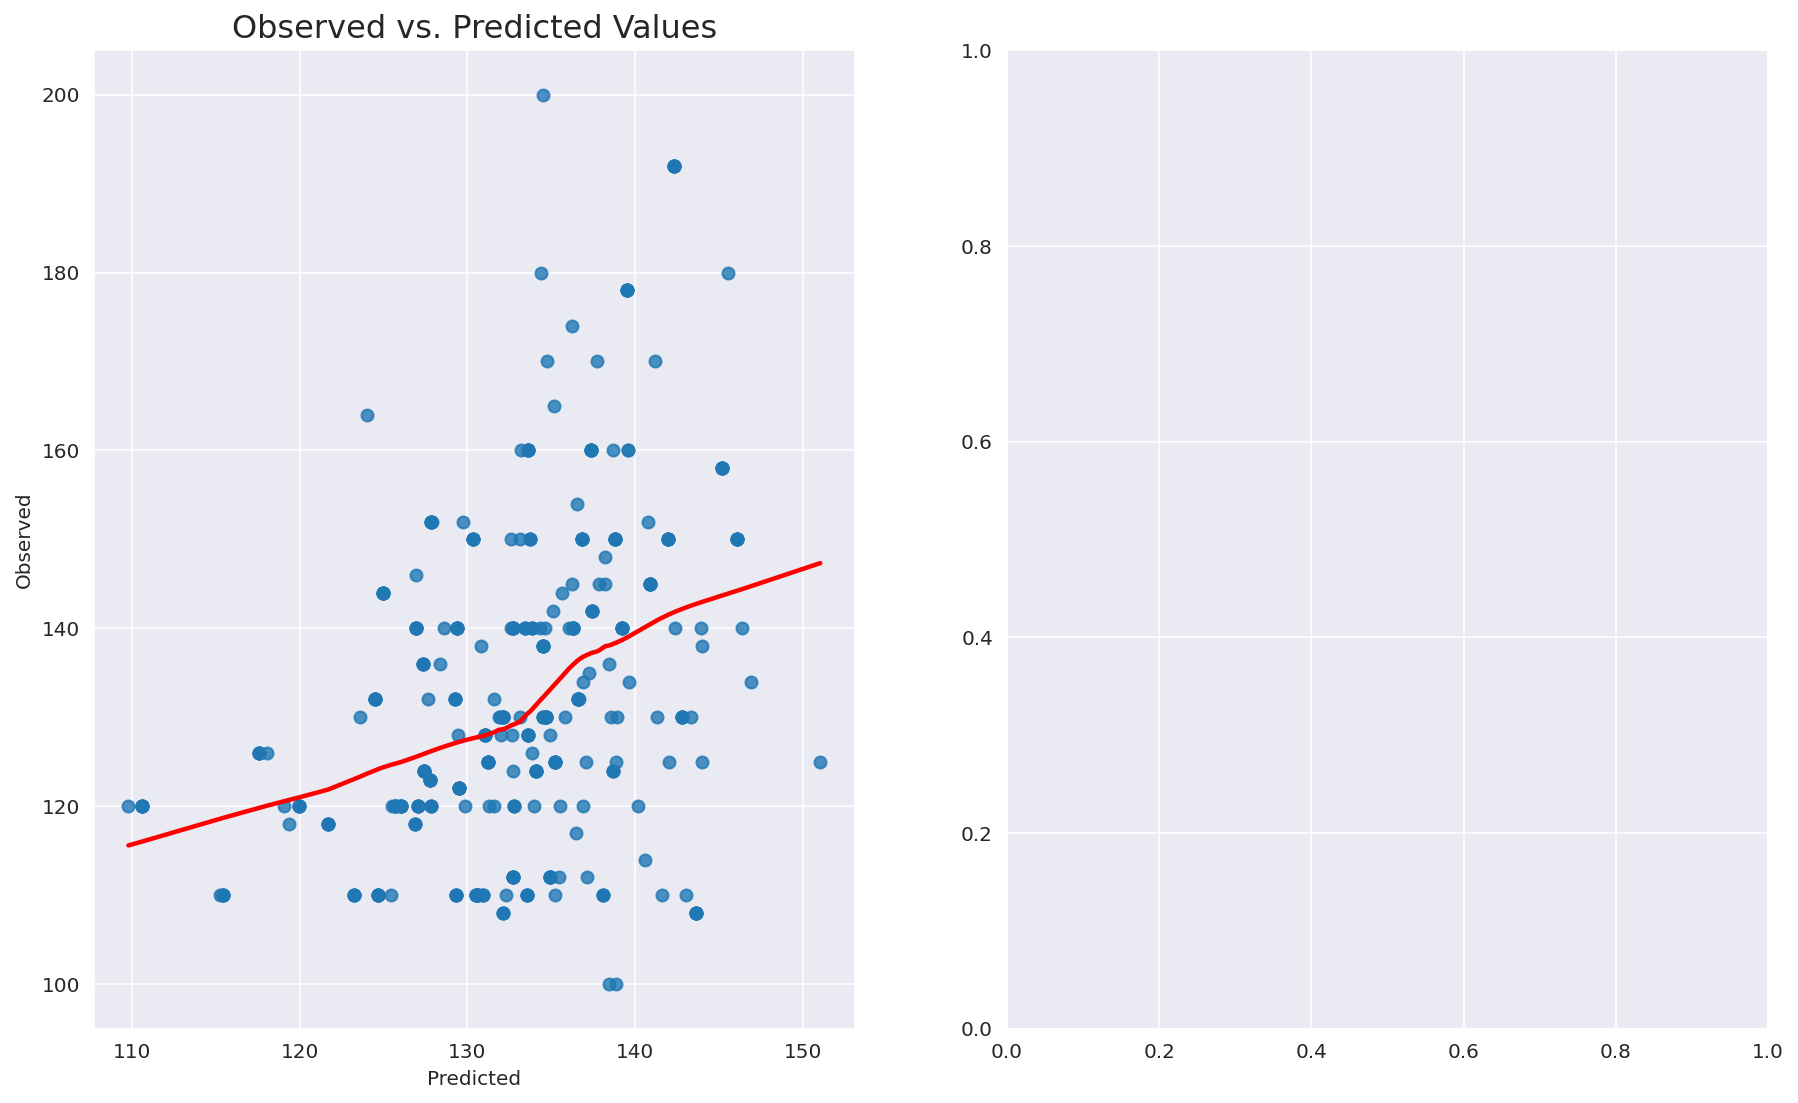

In [12]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
linearity_test(model, data['blood_pressure'])       

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


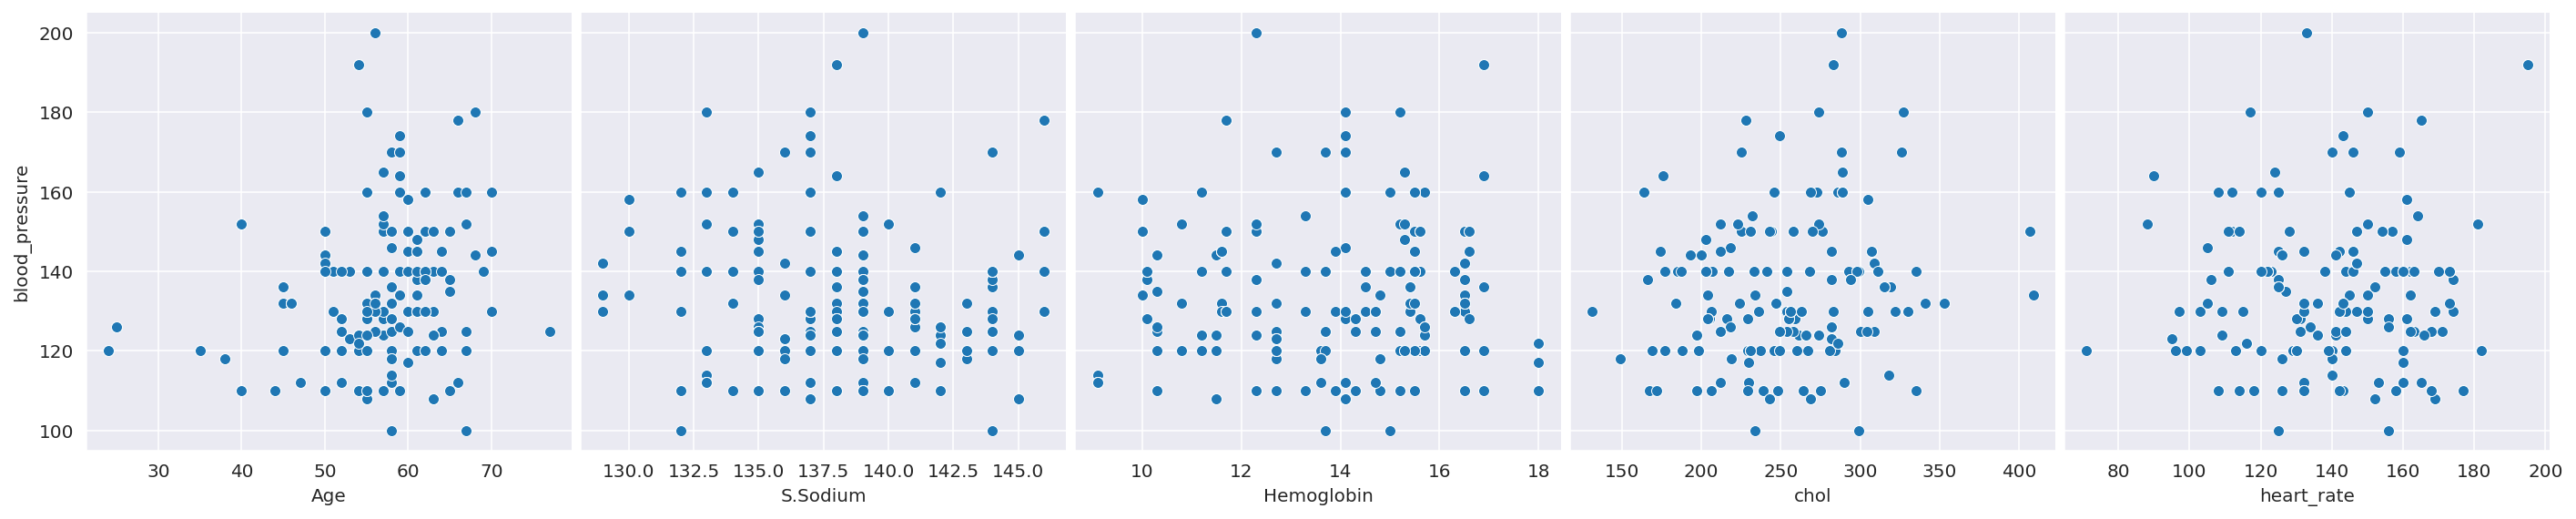

In [13]:
p=sns.pairplot(data, x_vars=['Age','S.Sodium','Hemoglobin','chol','heart_rate'], y_vars='blood_pressure',
               size=4, aspect=1.0)

In [14]:
data['logS']=np.log(data['S.Sodium'])
data['logH']=np.log(data['Hemoglobin'])
data['logC']=np.log(data['chol'])    
data['logHR']=np.log(data['heart_rate'])  

In [15]:
data = data.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [16]:
#Define x and y 
x = data[['Age','logS','logH','logC','logHR']]
y = data['blood_pressure']

# Modeling Multiple Linear Regression 
x = sm.add_constant(x)

model2 = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


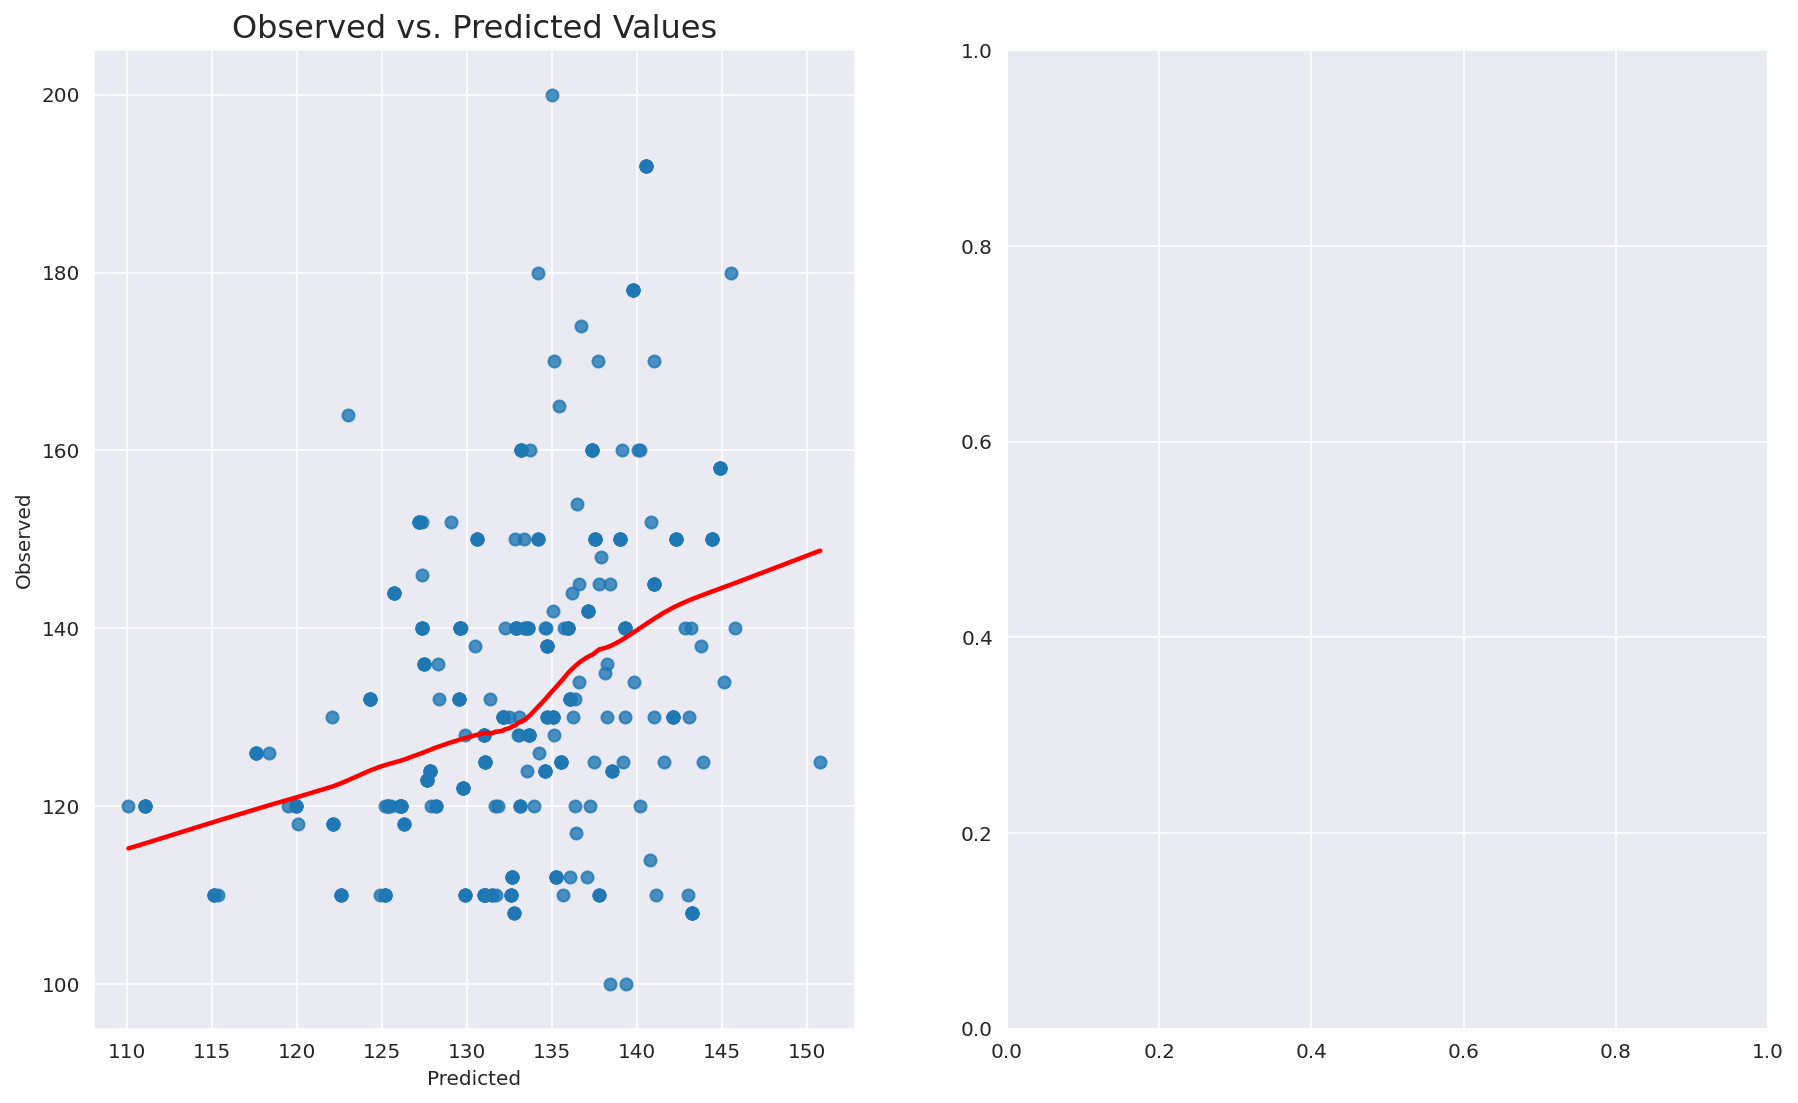

In [17]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model2, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model2.predict()

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
linearity_test(model2, data['blood_pressure'])       

**Normality of Residuals**

this assumes that the error terms of the model are normally distributed. There are a variety of ways to do so, use histogram, residual plots, the Anderson-Darling test, or Shapiro-Wilk Test for normality.

Shapiro-Wilk test ---- statistic: 0.9751, p-value: 0.0000
Anderson-Darling test ---- statistic: 2.2581, 5% critical value: 0.7790
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


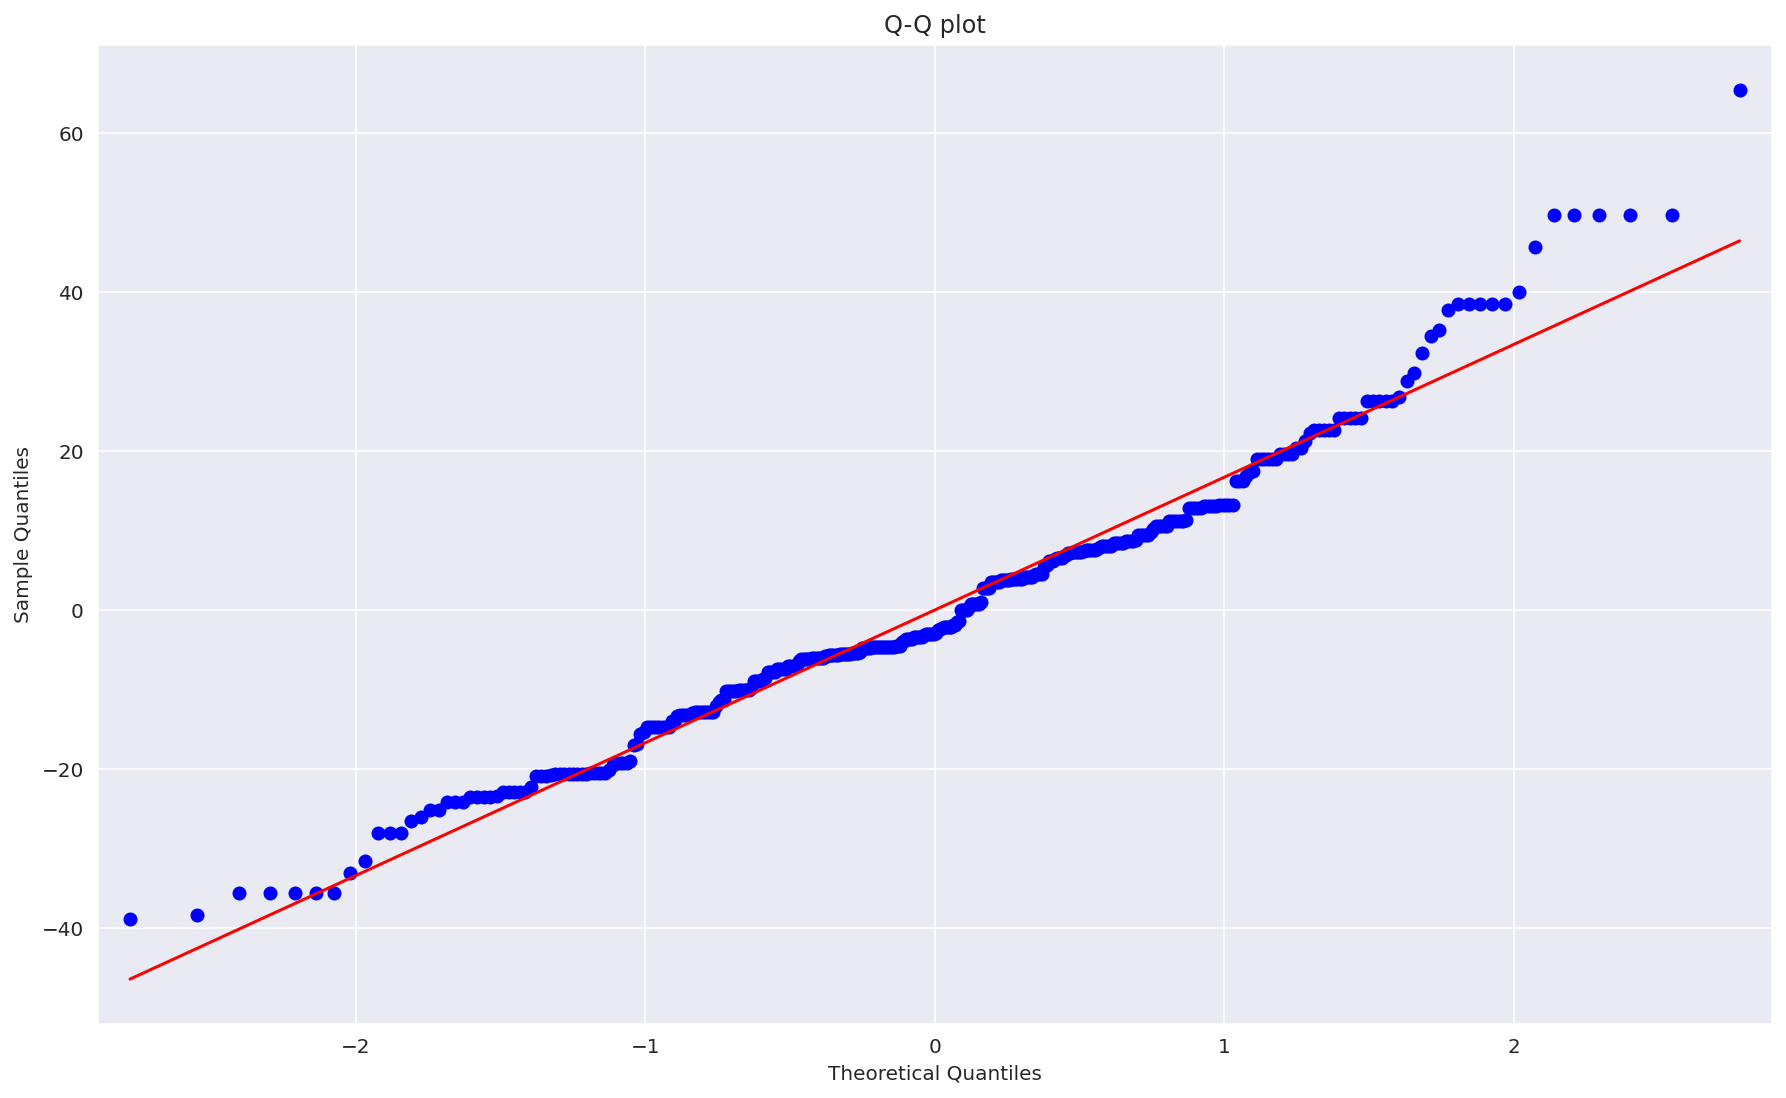

In [18]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 2 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model)

Shapiro-Wilk test ---- statistic: 0.9725, p-value: 0.0000
Anderson-Darling test ---- statistic: 2.4996, 5% critical value: 0.7790
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


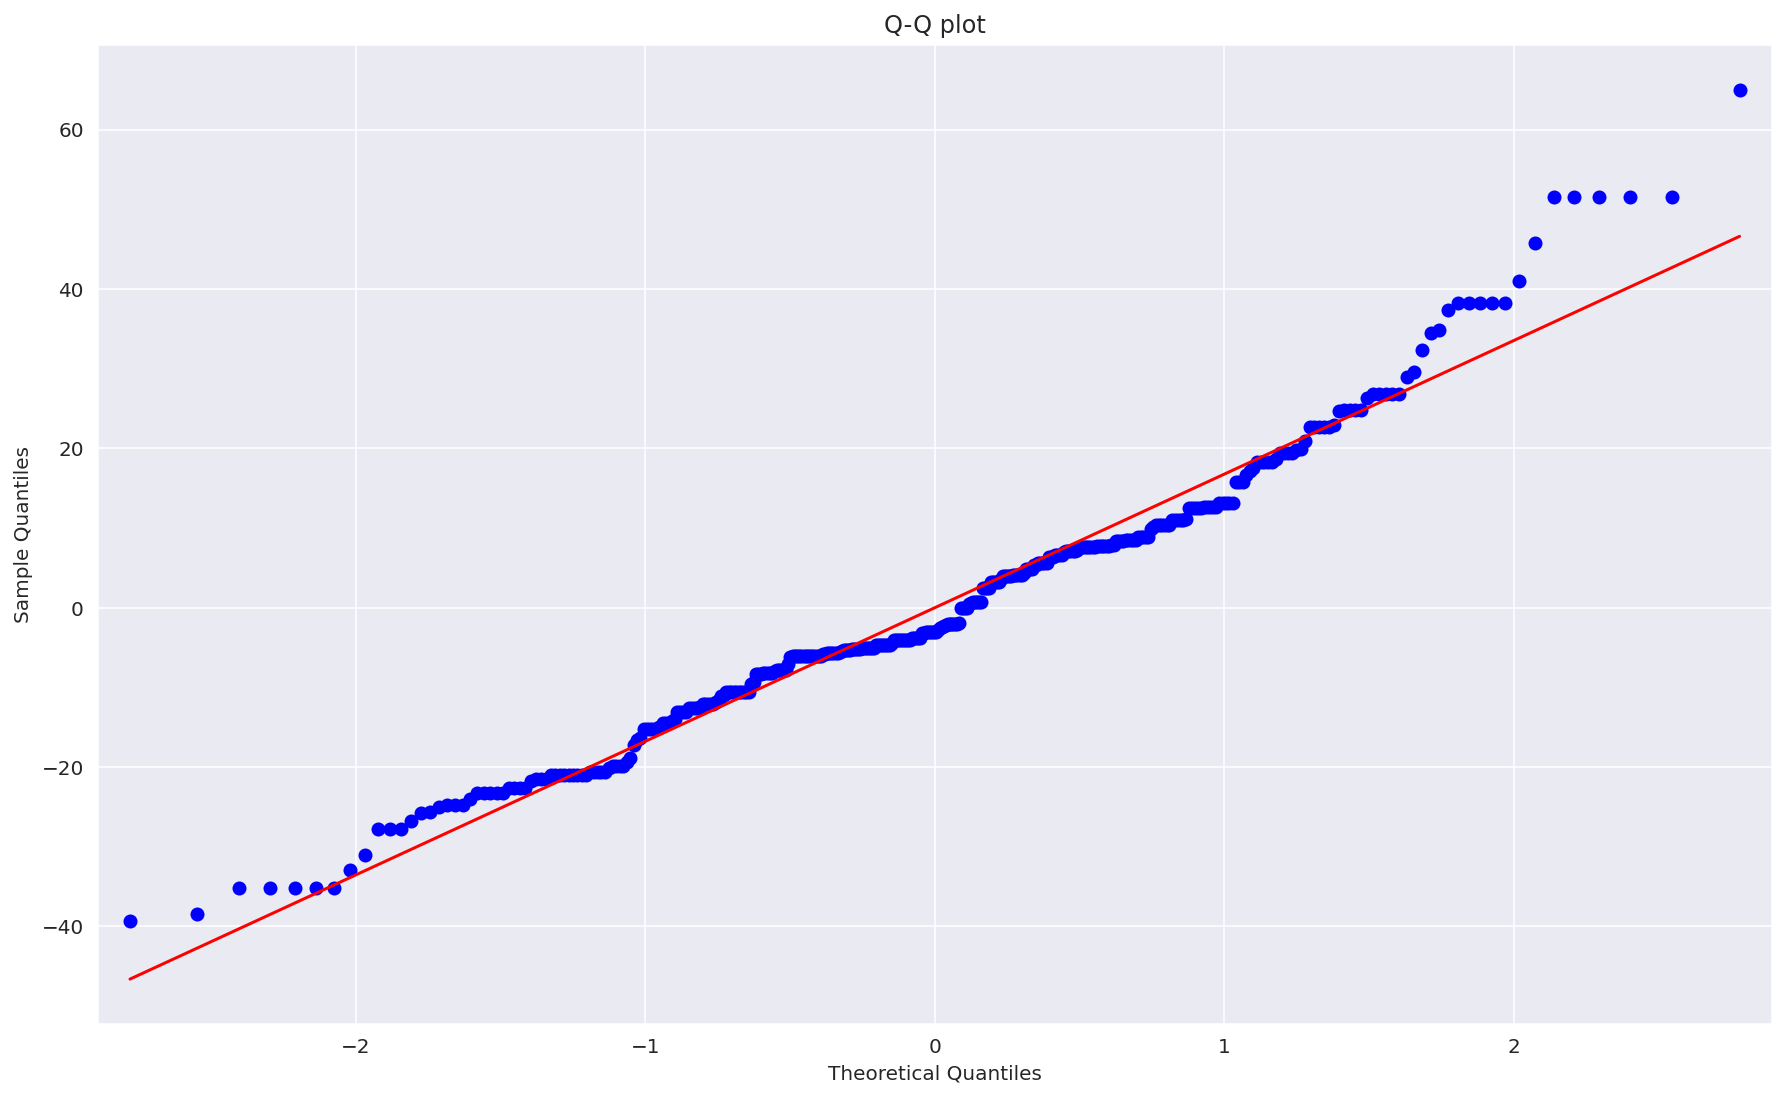

In [19]:
def normality_of_residuals_test(model2):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 2 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model2.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    sw = stats.shapiro(model2.resid)
    ad = stats.anderson(model2.resid, dist='norm')
    
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model2)

**Multicollinearity**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. 

Multicollinearity can be detected using VIF:
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,Feature,VIF
0,const,29262.754840
1,Age,1.090379
2,logS,1.018359
3,logH,1.086729
4,logC,1.056148
5,logHR,1.075924


## Model Interpretation

R-squared describes the proportion of variance of the dependent variable explained by the regression model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit

const coefficient is your Y-intercept. It means that if every independent variables are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

model.params represents the change in the output Y due to a change of one unit in each independent variables.

std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant. The number represents how likely the result was obtained due to randomness or chance. If the value is less than .05 than we can safely say that the result was not something due to random chance. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis. 

Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [21]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         blood_pressure   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.70
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.21e-11
Time:                        14:21:27   Log-Likelihood:                -1559.5
No. Observations:                 368   AIC:                             3131.
Df Residuals:                     362   BIC:                             3155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.9032    150.678      1.048      0.2

In [22]:
model.params

const    157.903201
Age        0.606479
logS     -44.435949
logH      -1.141549
logC      13.337691
logHR     18.345198
dtype: float64